Era prediction using VGG16 model
----

In [2]:
%matplotlib inline

In [3]:
# Imports
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

# https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py
import utils; reload(utils)
from utils import plots

# https://github.com/fastai/courses/blob/master/deeplearning1/nbs/vgg16.py
import vgg16; reload(vgg16)
from vgg16 import Vgg16

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [4]:
# Settings
batch_size = 64
nb_epoch = 10

In [5]:
# Testing with erasmus data
vgg = Vgg16()
# path = "data/era_split_0/"
# path = "data/era_split_1960s_1990s_0/"
path = "data/era_split_2labels_0/"
batches = vgg.get_batches(path + "train", batch_size=batch_size)
val_batches = vgg.get_batches(path + "valid", batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=nb_epoch)

Found 954 images belonging to 2 classes.
Found 316 images belonging to 2 classes.
Epoch 1/10
954/954 [==============================] - 36s - loss: 1.7998 - acc: 0.5314 - val_loss: 0.5939 - val_acc: 0.6677
Epoch 2/10
954/954 [==============================] - 34s - loss: 1.3502 - acc: 0.5744 - val_loss: 0.6148 - val_acc: 0.6709
Epoch 3/10
954/954 [==============================] - 31s - loss: 1.1934 - acc: 0.6059 - val_loss: 0.4681 - val_acc: 0.7785
Epoch 4/10
954/954 [==============================] - 32s - loss: 1.0695 - acc: 0.6342 - val_loss: 0.4788 - val_acc: 0.7753
Epoch 5/10
954/954 [==============================] - 32s - loss: 0.8801 - acc: 0.6740 - val_loss: 0.5639 - val_acc: 0.7310
Epoch 6/10
954/954 [==============================] - 32s - loss: 0.8479 - acc: 0.6803 - val_loss: 0.4977 - val_acc: 0.7848
Epoch 7/10
954/954 [==============================] - 32s - loss: 0.9376 - acc: 0.6656 - val_loss: 0.6365 - val_acc: 0.6709
Epoch 8/10
954/954 [==============================

Found 954 images belonging to 2 classes.


(array([ 0.9694,  0.8886,  0.9386,  0.867 ], dtype=float32),
 array([1, 0, 0, 0]),
 ['1970s_to_2000s', '1940s_to_1960s', '1940s_to_1960s', '1940s_to_1960s'])

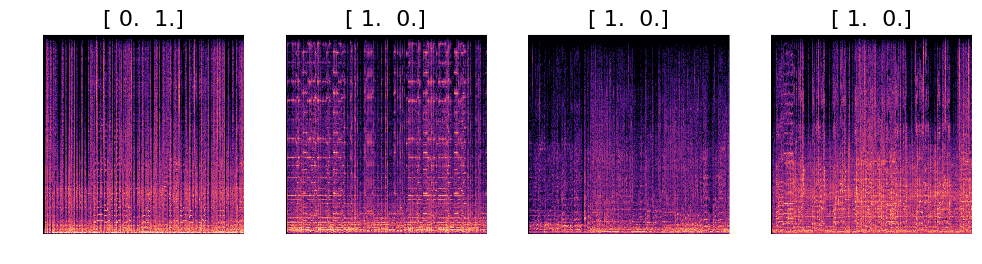

In [14]:
batches = vgg.get_batches(path + "train", batch_size=4)
imgs, labels = next(batches)
plots(imgs, titles=labels)
vgg.predict(imgs, True)

In [17]:
# Save the model
model = vgg.model
model.save(path + "vgg_model.h5")